<a href="https://colab.research.google.com/github/Colsai/DATA-690-WANG/blob/master/Individual%20Project/Project_Data_Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#I'm doing this through Colab (Mounting Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings 

In [17]:
def warn_off():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

warn_off()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: deprecated
  


In [18]:
os.getcwd()

'/content'

In [19]:
#List Files in Directory
dir = os.listdir('drive/My Drive/archive')

csv_files = []

for file in dir:
    if ".csv" in file:
        csv_files.append(file)
    else:
        csv_files

csv_files

['EdStatsCountry.csv',
 'EdStatsCountry-Series.csv',
 'EdStatsSeries.csv',
 'EdStatsData.csv',
 'EdStatsFootNote.csv',
 'states_all_extended.csv',
 'states_all.csv']

In [20]:
states_df = pd.read_csv('drive/My Drive/archive/states_all_extended.csv')
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,731634.0,58168.0,56139.0,59481.0,57948.0,58970.0,59929.0,62904.0,58025.0,60590.0,50629.0,44000.0,41167.0,55460.0,8224.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,207.0,208.0,204.0,208.0,211.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,253.0,NaN,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,122487.0,11030.0,10585.0,10135.0,9748.0,9896.0,9542.0,9392.0,8789.0,9187.0,7889.0,7057.0,6714.0,10152.0,2371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,673477.0,58914.0,56814.0,55630.0,55433.0,54630.0,53832.0,52793.0,49081.0,51426.0,46790.0,39584.0,37410.0,53497.0,2544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,209.0,215.0,206.0,215.0,213.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,441490.0,34929.0,34517.0,34044.0,34632.0,34740.0,35017.0,37448.0,36011.0,33518.0,32700.0,29244.0,27651.0,33511.0,808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,210.0,208.0,211.0,214.0,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,257.0,NaN,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,5254844.0,443955.0,436488.0,424961.0,418418.0,410701.0,399776.0,388439.0,363296.0,396482.0,375327.0,329527.0,270675.0,431763.0,59067.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202.0,208.0,198.0,209.0,207.0,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,260.0,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def state_finder(dataframe, column, name):
    find_it = dataframe[dataframe[column].str.contains(name)]
    return find_it

In [22]:
md_df = state_finder(states_df, "STATE", "MARYLAND")
md_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
20,1992_MARYLAND,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,1461083.0,NaN,340298.0,751850.0,62608.0,61983.0,61199.0,60287.0,59139.0,58196.0,56395.0,52815.0,56567.0,49977.0,42825.0,40426.0,59641.0,16081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,217.0,207.0,219.0,215.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,1993_MARYLAND,MARYLAND,1993,751850.0,4918010.0,252211.0,1940713.0,2725086.0,4898895.0,2785206.0,1508203.0,224147.0,324925.0,772638.0,64504.0,62421.0,62141.0,61199.0,60377.0,60127.0,58407.0,55285.0,60213.0,50116.0,46082.0,40661.0,60378.0,17984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,1994_MARYLAND,MARYLAND,1994,772638.0,5141505.0,258611.0,2002382.0,2880512.0,5187683.0,2812922.0,1673254.0,254041.0,387699.0,790938.0,65377.0,64160.0,62270.0,61982.0,61010.0,60953.0,60049.0,57222.0,63067.0,51978.0,45585.0,43223.0,62341.0,18834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,210.0,NaN,205.0,NaN,214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1995_MARYLAND,MARYLAND,1995,790938.0,5580123.0,270249.0,2059219.0,3250655.0,5610071.0,3064702.0,1768323.0,253194.0,458731.0,805544.0,67348.0,65055.0,63940.0,62207.0,61814.0,61099.0,60747.0,58835.0,64468.0,54286.0,47345.0,42974.0,63232.0,19092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,1996_MARYLAND,MARYLAND,1996,805544.0,5688918.0,271806.0,2163187.0,3253925.0,5825606.0,3197895.0,1856055.0,251330.0,449601.0,818583.0,68645.0,66645.0,64728.0,63693.0,62178.0,61962.0,61268.0,59236.0,65307.0,56261.0,49695.0,44232.0,61856.0,19639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
md_df = md_df.sort_values(by="YEAR", ascending = True)
md_df.drop("PRIMARY_KEY", axis=1) #Let's drop the "Primary Key", since it doesn't really serve a purpose here.

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,G01_TR_F,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
1415,MARYLAND,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675747.0,55915.0,51196.0,48875.0,48378.0,44985.0,46081.0,47828.0,47315.0,57118.0,56031.0,51860.0,47584.0,50505.0,9361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,MARYLAND,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683797.0,58466.0,54096.0,51826.0,49555.0,48477.0,46532.0,48134.0,46717.0,53370.0,51297.0,50624.0,48642.0,53146.0,10032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,MARYLAND,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688947.0,61032.0,56492.0,54629.0,52046.0,49418.0,50235.0,47803.0,46782.0,52169.0,47541.0,46285.0,47248.0,53667.0,10882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1418,MARYLAND,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698806.0,61668.0,59067.0,56650.0,55009.0,51980.0,51106.0,51443.0,46629.0,52248.0,46800.0,43185.0,43302.0,54709.0,12238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,MARYLAND,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715176.0,61911.0,60252.0,59120.0,57228.0,54921.0,53811.0,51722.0,49864.0,52363.0,46389.0,42627.0,40529.0,56617.0,14360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,261.0,NaN,261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1420,MARYLAND,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,736238.0,62664.0,61405.0,60608.0,59493.0,57493.0,56466.0,54300.0,50447.0,55972.0,46806.0,42794.0,40512.0,57658.0,15567.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,MARYLAND,1992,NaN,4658498.0,228336.0,1778834.0,2651328.0,4698374.0,2628891.0,1461083.0,NaN,340298.0,751850.0,62608.0,61983.0,61199.0,60287.0,59139.0,58196.0,56395.0,52815.0,56567.0,49977.0,42825.0,40426.0,59641.0,16081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,217.0,207.0,219.0,215.0,216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,266.0,NaN,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## a. Looking at Student Enrollment in MD

Text(0, 0.5, 'Total Student Enrollment')

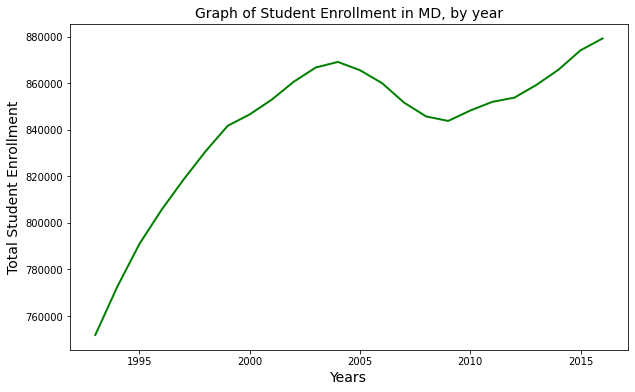

In [51]:
#Showing Progression of funding over years
x = md_df['YEAR']
k = md_df['ENROLL']

fig, ax = plt.subplots(figsize = (10,6))

ax.plot(x, k, 'green', linewidth=2, markersize= 12)

plt.xscale('linear')

ax.set_title("Graph of Student Enrollment in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Student Enrollment", color='black', size = 14)

## b. Looking at Expenditures

Text(0, 0.5, 'Total Revenue')

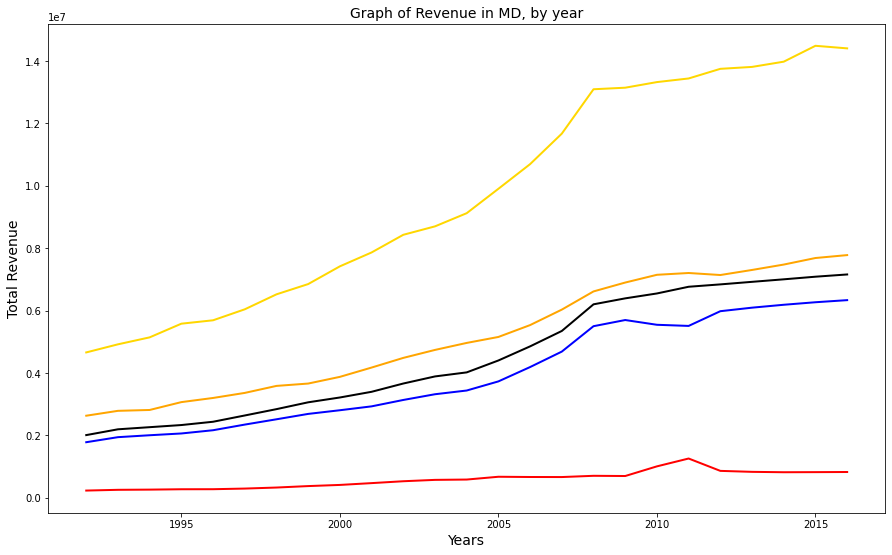

In [42]:
#Showing Progression of funding over years
x = md_df['YEAR']
y = md_df['TOTAL_REVENUE']
z = md_df['FEDERAL_REVENUE']
a = md_df['STATE_REVENUE']
b = md_df['INSTRUCTION_EXPENDITURE']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x, y, 'gold', linewidth=2, markersize= 12)
ax.plot(x, z, 'red', linewidth=2, markersize=12)
ax.plot(x, a, 'blue', linewidth=2, markersize=12)
ax.plot(x, z+a, 'black', linewidth=2, markersize=12)
ax.plot(x, b, 'orange', linewidth=2, markersize=12)

plt.xscale('linear')

ax.set_title("Graph of Revenue in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Revenue", color='black', size = 14)

Text(0, 0.5, 'Total Revenue')

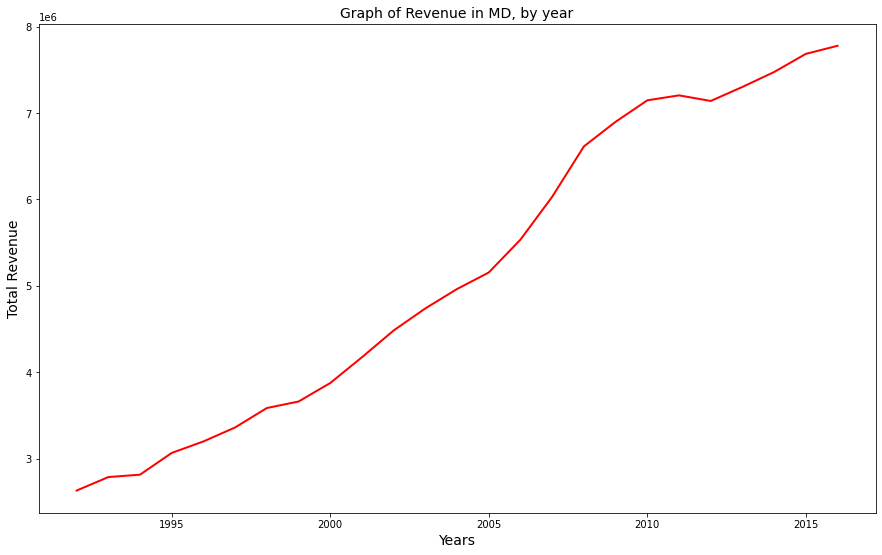

In [54]:
#Relationally, Federal Revenue does not look like it has significantly increased.
x = md_df['YEAR']
z = md_df['FEDERAL_REVENUE']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x, z, 'red', linewidth=2, markersize=12)

plt.xscale('linear')

ax.set_title("Graph of Revenue in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Revenue", color='black', size = 14)


# Has education expenditure per student grown or fallen?
Looking at the graph, it has definitely fallen.

Text(0, 0.5, 'Total Revenue')

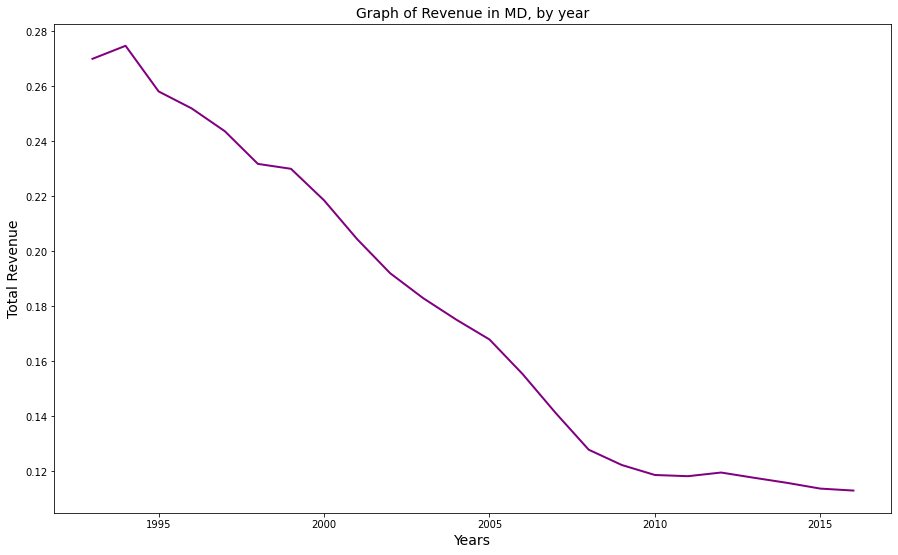

In [56]:
#Relationally, Federal Revenue does not look like it has significantly increased.
x = md_df['YEAR']
k = md_df['ENROLL']
z = md_df['INSTRUCTION_EXPENDITURE']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x, k/z, 'purple', linewidth=2, markersize=12)

plt.xscale('linear')

ax.set_title("Graph of Revenue in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Revenue", color='black', size = 14)


Text(0, 0.5, 'Total Revenue')

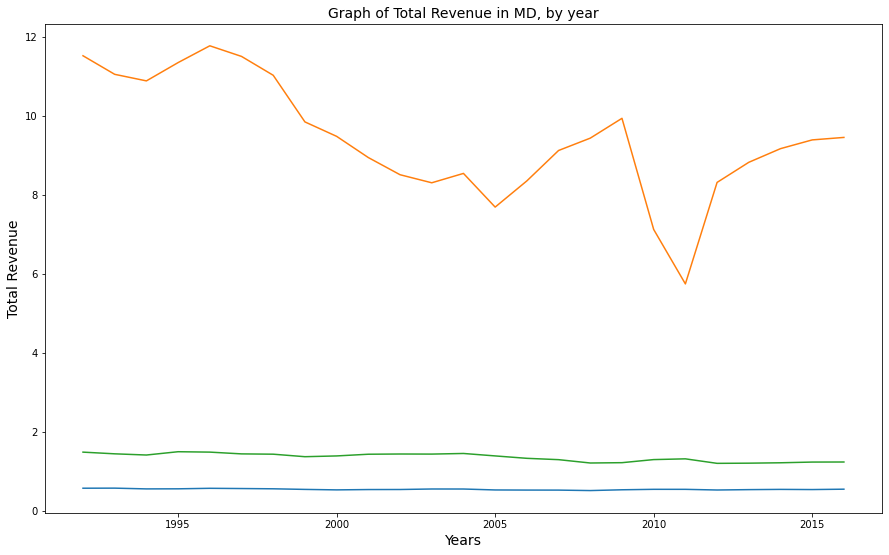

In [25]:
x = md_df['YEAR']
y = md_df['TOTAL_REVENUE']
z = md_df['FEDERAL_REVENUE']
a = md_df['STATE_REVENUE']
b = md_df['INSTRUCTION_EXPENDITURE']

fig, ax = plt.subplots(figsize = (15,9))

ax.plot(x,b/y,
        x,b/z,
        x,b/a,)

plt.xscale('linear')

ax.set_title("Graph of Total Revenue in MD, by year", color='black', size = 14)
ax.set_xlabel("Years", color='black', size = 14)
ax.set_ylabel("Total Revenue", color='black', size = 14)

In [29]:
md_df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       ...
       'G08_HI_A_READING', 'G08_HI_A_MATHEMATICS', 'G08_AS_A_READING',
       'G08_AS_A_MATHEMATICS', 'G08_AM_A_READING', 'G08_AM_A_MATHEMATICS',
       'G08_HP_A_READING', 'G08_HP_A_MATHEMATICS', 'G08_TR_A_READING',
       'G08_TR_A_MATHEMATICS'],
      dtype='object', length=266)

In [32]:
md_df.shape

(33, 266)

Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

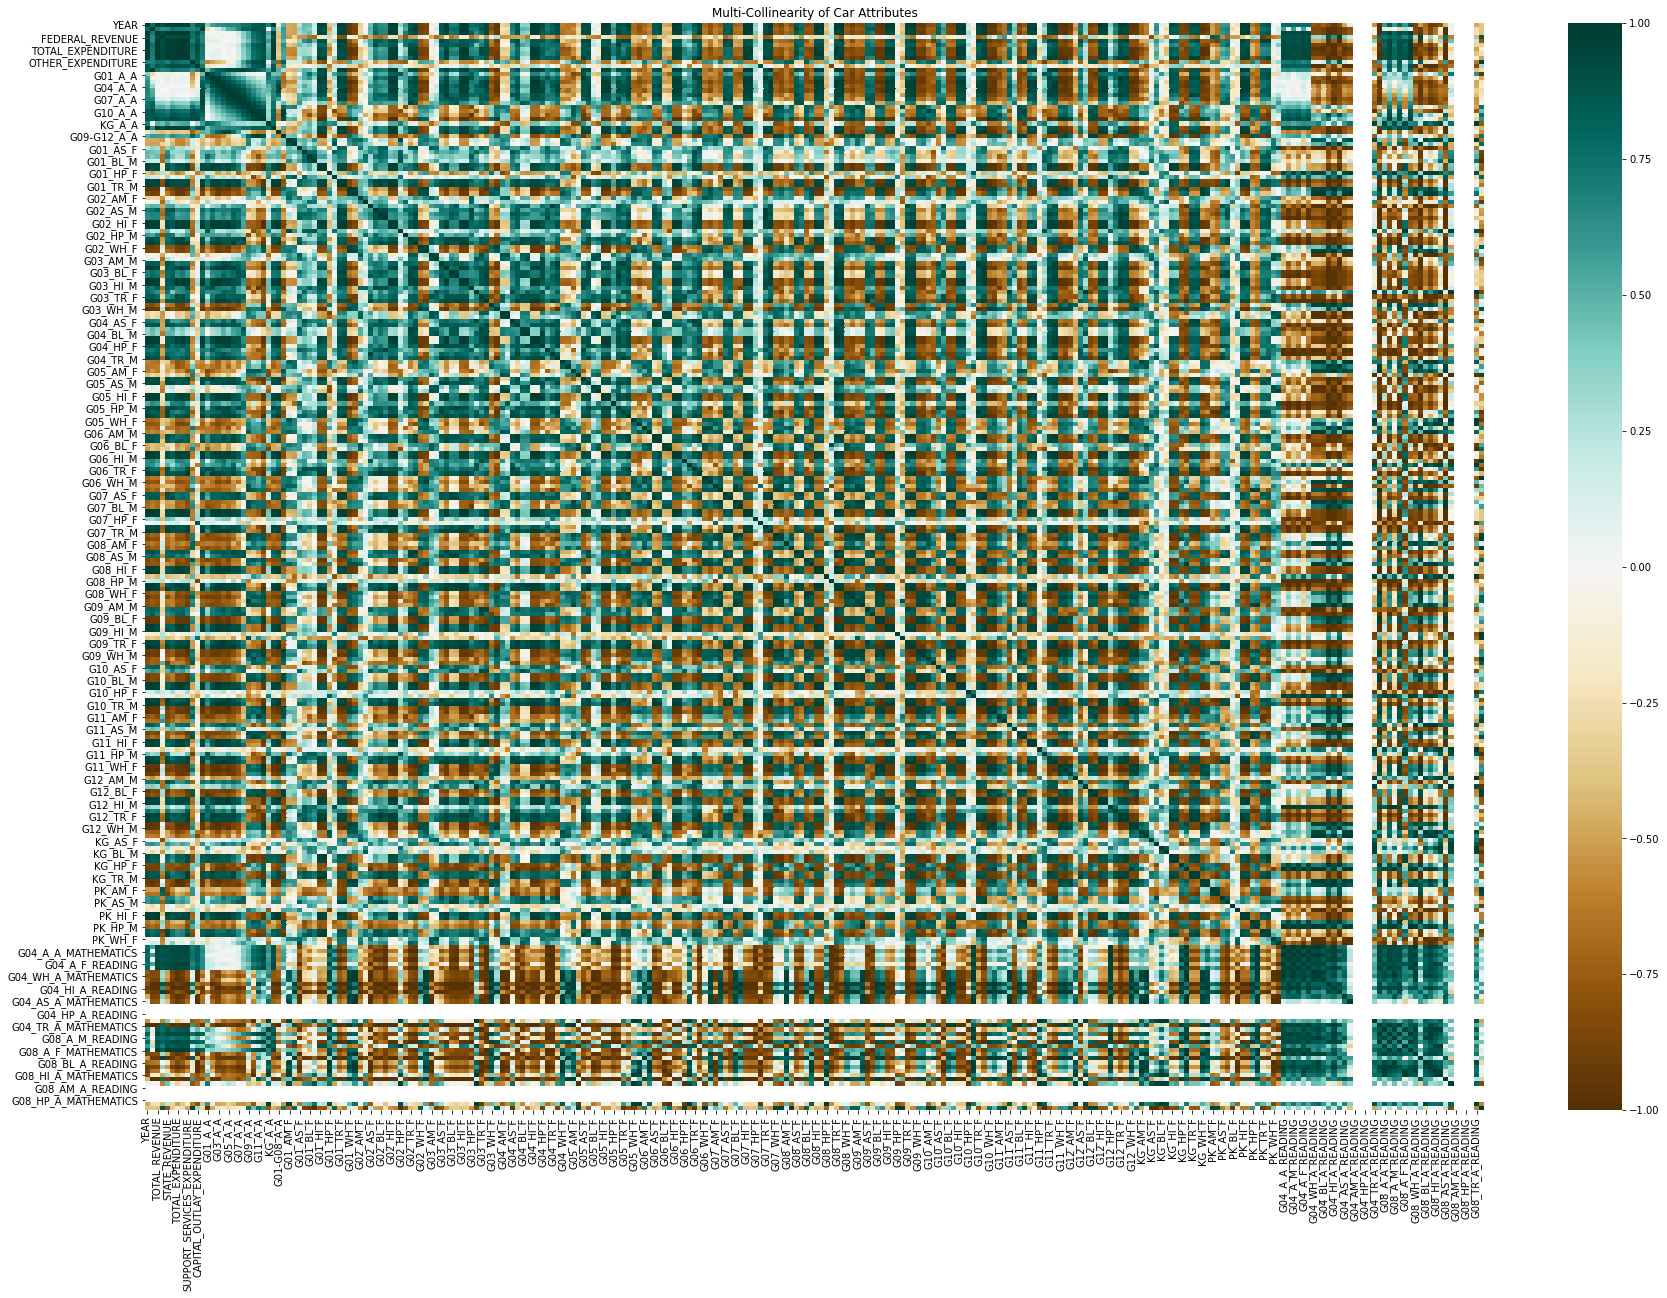

In [58]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(md_df.corr(), center=0, cmap='BrBG')
ax.set_title('Multi-Collinearity of Maryland Education Variables')

In [66]:
md_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,A_A_A,G01_A_A,G02_A_A,G03_A_A,G04_A_A,G05_A_A,G06_A_A,G07_A_A,G08_A_A,G09_A_A,G10_A_A,G11_A_A,G12_A_A,KG_A_A,PK_A_A,G01-G08_A_A,G09-G12_A_A,G01_AM_F,G01_AM_M,G01_AS_F,G01_AS_M,G01_BL_F,G01_BL_M,G01_HI_F,G01_HI_M,G01_HP_F,G01_HP_M,...,G04_A_A_READING,G04_A_A_MATHEMATICS,G04_A_M_READING,G04_A_M_MATHEMATICS,G04_A_F_READING,G04_A_F_MATHEMATICS,G04_WH_A_READING,G04_WH_A_MATHEMATICS,G04_BL_A_READING,G04_BL_A_MATHEMATICS,G04_HI_A_READING,G04_HI_A_MATHEMATICS,G04_AS_A_READING,G04_AS_A_MATHEMATICS,G04_AM_A_READING,G04_AM_A_MATHEMATICS,G04_HP_A_READING,G04_HP_A_MATHEMATICS,G04_TR_A_READING,G04_TR_A_MATHEMATICS,G08_A_A_READING,G08_A_A_MATHEMATICS,G08_A_M_READING,G08_A_M_MATHEMATICS,G08_A_F_READING,G08_A_F_MATHEMATICS,G08_WH_A_READING,G08_WH_A_MATHEMATICS,G08_BL_A_READING,G08_BL_A_MATHEMATICS,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
1415,1986_MARYLAND,MARYLAND,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,675747.0,55915.0,51196.0,48875.0,48378.0,44985.0,46081.0,47828.0,47315.0,57118.0,56031.0,51860.0,47584.0,50505.0,9361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,1987_MARYLAND,MARYLAND,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,683797.0,58466.0,54096.0,51826.0,49555.0,48477.0,46532.0,48134.0,46717.0,53370.0,51297.0,50624.0,48642.0,53146.0,10032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,1988_MARYLAND,MARYLAND,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688947.0,61032.0,56492.0,54629.0,52046.0,49418.0,50235.0,47803.0,46782.0,52169.0,47541.0,46285.0,47248.0,53667.0,10882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1418,1989_MARYLAND,MARYLAND,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,698806.0,61668.0,59067.0,56650.0,55009.0,51980.0,51106.0,51443.0,46629.0,52248.0,46800.0,43185.0,43302.0,54709.0,12238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1419,1990_MARYLAND,MARYLAND,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715176.0,61911.0,60252.0,59120.0,57228.0,54921.0,53811.0,51722.0,49864.0,52363.0,46389.0,42627.0,40529.0,56617.0,14360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261.0,NaN,261.0,NaN,261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Multi-Collinearity of Maryland Education Variables')

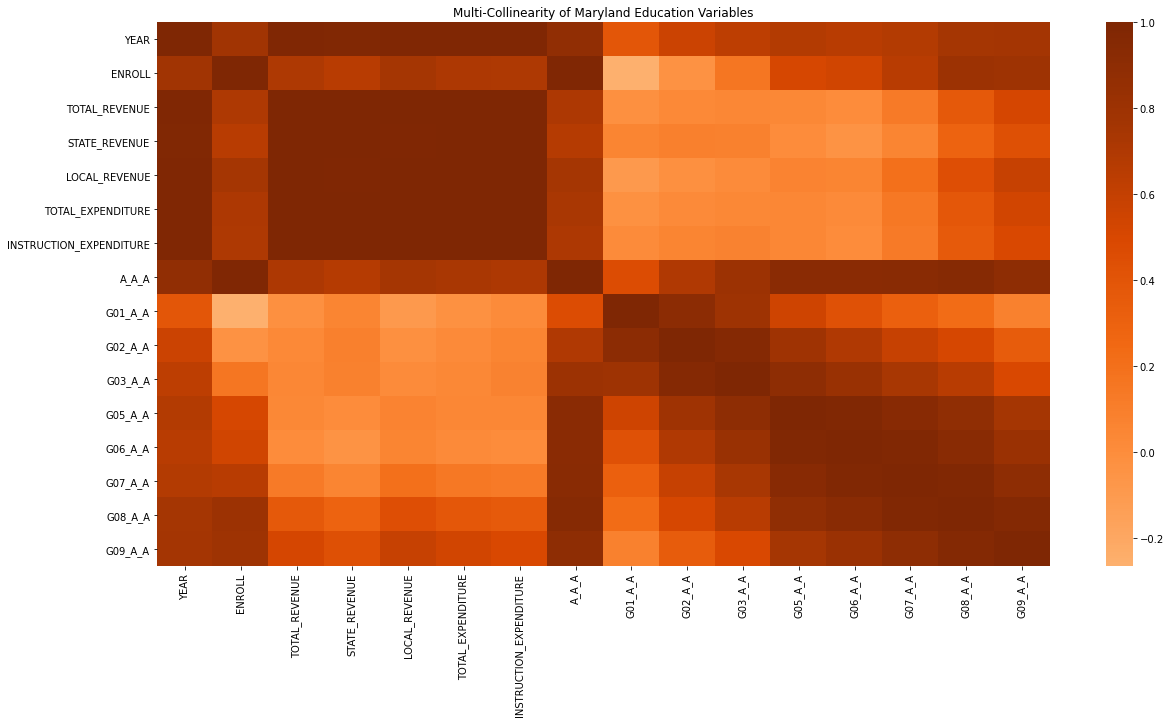

In [82]:
#Ok, let's pick a more sensible set than just everything...
md_df2 = md_df[["YEAR", 
                "ENROLL", 
                "TOTAL_REVENUE",
                "STATE_REVENUE",
                "LOCAL_REVENUE",
                "TOTAL_EXPENDITURE",
                "INSTRUCTION_EXPENDITURE",
                "A_A_A",
                "G01_A_A",
                "G02_A_A",
                "G03_A_A",
                "G05_A_A",
                "G06_A_A",
                "G07_A_A",
                "G08_A_A",
                "G09_A_A",                                                
                ]]

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(md_df2.corr(), center=0, cmap='Oranges')
ax.set_title('Multi-Collinearity of Maryland Education Variables')